# NanoPyx "Codeless" Jupyter Notebook

### This notebook allows you to generate align a timelapse

**Drift Correction** Romain F Laine et al 2019 J. Phys. D: Appl. Phys. 52 163001

## Notebook setup cell
Run the following cell to install nanopyx

In [ ]:
!pip install git+https://github.com/HenriquesLab/NanoPyx.git

Now, import all necessary python libraries

In [1]:
import io
import os
import skimage
import numpy as np
import tifffile as tiff
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib import pyplot as plt

from nanopyx.methods import drift_alignment
from nanopyx.core.utils.easy_gui import EasyGui
from nanopyx.core.utils.easy_gui import view_image_stack, view_curtain_stack, view_image

## Select which image to load

Label(value='Select data to use:', layout=Layout(width='50%'), style=LabelStyle(description_width='initial'))

FileChooser(path='/Users/bsaraiva/Code/NanoPyx/notebooks', filename='', title='', show_hidden=False, select_de…

Button(description='Load data', layout=Layout(width='50%'), style=ButtonStyle())

interactive(children=(IntSlider(value=0, description='dim0', max=29), Output()), _dom_classes=('widget-interac…

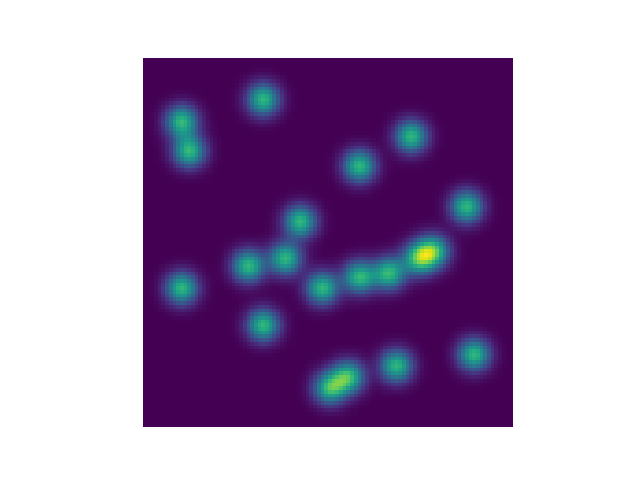

In [2]:
%matplotlib widget
# Create a GUI
gui_data = EasyGui("Data Loader")

def on_button_load_data_clicked(b):
    clear_output()
    gui_data.show()
    global dataset_original
    # disable button
    gui_data["load_data"].disabled = True
    gui_data["load_data"].description = "Loading..."
    dataset_original = tiff.imread(gui_data["upload"].selected)
    gui_data["load_data"].disabled = False
    gui_data["load_data"].description = "Load data"
    view_image_stack(dataset_original)

gui_data.add_label("Select data to use:")
gui_data.add_file_upload("upload")
gui_data.add_button("load_data", description="Load data")
gui_data["load_data"].on_click(on_button_load_data_clicked)
gui_data.show()

## Now let's perform the alignemnt

Label(value='Drift Correction parameters:', layout=Layout(width='50%'), style=LabelStyle(description_width='in…

Dropdown(description='Reference frame', index=1, layout=Layout(width='50%'), options=('First frame', 'Pervious…

IntSlider(value=30, description='Max expected drift', layout=Layout(width='50%'), max=1000, style=SliderStyle(…

IntSlider(value=1, description='Time averaging', layout=Layout(width='50%'), max=30, min=1, style=SliderStyle(…

Button(description='Align', layout=Layout(width='50%'), style=ButtonStyle())

apply_correction took 0.007 seconds
estimate took 0.04 seconds

estimate_drift_alignment took 0.043 seconds


interactive(children=(IntSlider(value=0, description='dim0', max=29), Output()), _dom_classes=('widget-interac…

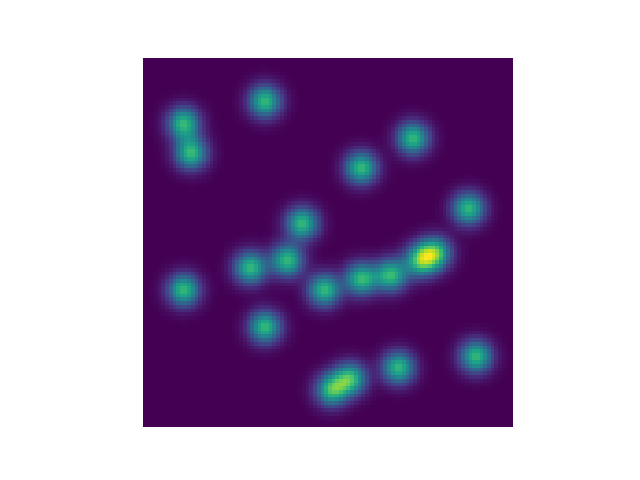

In [ ]:
gui_drift = EasyGui("Drift Correction")

def on_button_align(b):
    clear_output()
    gui_drift.show()
    if gui_drift["ref"].value == "First frame":
        ref_option = 0
    else:
        ref_option = 1
    avg = gui_drift["time_averaging"].value
    max_drift = gui_drift["max"].value
    global dataset_aligned
    gui_drift["align"].disabled = True
    gui_drift["align"].description = "Aligning..."
    dataset_aligned = drift_alignment.estimate_drift_alignment(dataset_original,
                                                               save_drift_table_path="",
                                                               time_averaging=avg,
                                                               max_expected_drift=max_drift,
                                                               ref_option=ref_option,
                                                               apply=True)
    gui_drift["align"].disabled = False
    gui_drift["align"].description = "Align"
    view_image_stack(dataset_aligned)

gui_drift.add_label("Drift Correction parameters:")
gui_drift.add_dropdown("ref", description="Reference frame", options=["First frame", "Previous frame"], value="First frame")
gui_drift.add_int_slider("max", description="Max expected drift", min=0, max=1000, value=10)
gui_drift.add_int_slider("time_averaging", description="Time averaging", min=1, max=dataset_original.shape[0], value=1)
gui_drift.add_button("align", description="Align")
gui_drift["align"].on_click(on_button_align)
gui_drift.show()